# Agilepy quickstart notebook

This notebook will show you how to use the Agilepy library.

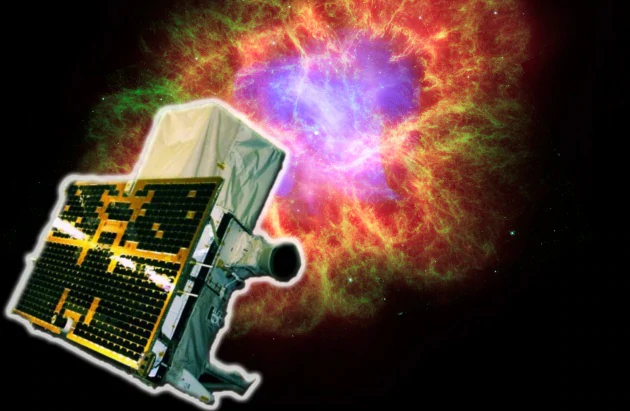

In [1]:
from IPython.display import Image
Image(filename='static/agilecrab.jpg')

## The output directory must deleted first

The path to the output directory is defined in the configuration file (more on that later).

In [2]:
import os
from pathlib import Path
from shutil import rmtree

In [3]:
outDir = Path(os.environ["AGILE"]).joinpath( Path("agilepy-test-data/unittesting-output/jupyter/") )

if outDir.exists() and outDir.is_dir():
    print("Removing",outDir)
    rmtree(outDir)

Removing /opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter


In [4]:
def readFile(filepath):
    with open(filepath, "r") as f:
        return f.readlines()

## Using the API class

We need to import the class in our scope

In [5]:
from agilepy.api.AGAnalysis import AGAnalysis

The constructor need two files:
* a configuration file (yaml)
* a file containing a list of sources (xml)

For this tutorial, we already wrote them. If you want to look at all the possible configuration options, check the [Agilepy's documentation](https://agilepy.readthedocs.io/en/latest/manual/configuration_file.html).

Run the next cell to read the minimal configuration file we wrote:

In [6]:
with open("./config_file.yaml") as f:
    print(f.read())

input:
  evtfile: $AGILE/agilepy-test-data/evt_index/agile_proc3_fm3.119_asdc2_EVT.index
  logfile: $AGILE/agilepy-test-data/log_index/agile_proc3_data_asdc2_LOG.log.index

output:
  outdir: $AGILE/agilepy-test-data/unittesting-output/jupyter
  filenameprefix: quickstart
  logfilenameprefix: quickstart
  verboselvl: 1

selection:
  tmin: 456361778
  tmax: 456537945
  timetype: TT
  glon: 80
  glat: 0



Run the next cell to read the xml file containing the descriptions of two sources:

In [7]:
with open("./sources.xml") as f:
    print(f.read())

<?xml version="1.0" ?>
<source_library title="source library">

  <source name="2AGLJ2021+4029" type="PointSource">
    <spectrum type="PLExpCutoff">
      <parameter name="Flux" free="1"  value="119.3e-08"/>
      <parameter name="Index" free="0" scale="-1.0" value="1.75" min="0.5" max="5"/>
      <parameter name="CutoffEnergy" free="0" value="3307.63" min="20" max="10000"/>
    </spectrum>
    <spatialModel type="PointSource" location_limit="0" free="0">
      <parameter name="GLON" value="78.2375" />
      <parameter name="GLAT" value="2.12298" />
    </spatialModel>
  </source>

  <source name="2AGLJ2021+3654" type="PointSource">
    <spectrum type="PLExpCutoff">
      <parameter name="Flux" free="1"  value="70.89e-08"/>
      <parameter name="Index" free="0" scale="-1.0" value="1.38" min="0.5" max="5"/>
      <parameter name="CutoffEnergy" free="0" value="960.59" min="20" max="10000"/>
    </spectrum>
    <spatialModel type="PointSource" location_limit="0" free="0">
      <paramet

## Calling the constructor

You need to instantiate the class if you want to use it. 

The [constructor](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis) will setup a console logger which verbosity is defined by the *'verboselvl'* configuration option. A file logger is activated as well and its verbosity is always set to the maximum value.

The user-defined configuration options will override the default ones. A validation step is then performed: in case of wrong/malformed configuration options an Exception will be raised.  

All the sources present in *sources.xml* are loaded in-memory inside an object of class *SourcesLibrary* which is a member of the *AGAnalysis* class. 

In [8]:
ag = AGAnalysis("./config_file.yaml", "./sources.xml")

2020-01-31 10:52:45,066 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/quickstart_20200131-105245.log


## Generating maps

You can use the [generateMaps()](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.generateMaps) method to produce one or more sky maps of 4 different types (counts, exposure, gas and int) using the AGILE data. The method's behaviour is controlled by several configuration options. Check the [*'map'* section of the documentation](https://agilepy.readthedocs.io/en/latest/manual/configuration_file.html#maps) for more.

The method will return a maplist file, which format is [described here](https://agilepy.readthedocs.io/en/latest/manual/products.html#maplist-file). 

In [9]:
mapfilepath = ag.generateMaps()

2020-01-31 10:52:45,073 [INFO    ] [CtsMapGenerator] Science tool called!
2020-01-31 10:52:45,862 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced ['/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.cts.gz']
2020-01-31 10:52:45,863 [INFO    ] [ExpMapGenerator] Science tool called!
2020-01-31 10:52:51,206 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced ['/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.exp.gz']
2020-01-31 10:52:51,207 [INFO    ] [GasMapGenerator] Science tool called!
2020-01-31 10:52:51,924 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced ['/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.gas.gz']
2020-01-31 10:52:51,925 [INFO    ] [IntMapGenerator] Science tool called!
2020-01-31 10:52:52,132 [INFO    ] [AGAnalys

Let's print the content of the mapfile:

In [10]:
with open(mapfilepath) as f:
    print(f.read())

/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.cts.gz /opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.exp.gz /opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/maps/quickstart_EMIN00100_EMAX10000_01.gas.gz 30 -1 -1



## Starting an maximum likelyhood estimation analysis

Again, the behaviour of this analysis can be configured by sevaral configuration options. Check the [*'mle'* section of the documentation](https://agilepy.readthedocs.io/en/latest/manual/configuration_file.html#mle) for more.

The [mle(mapfilepath)](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.mle) performs a maximum likelyhood estimation analysis and it produces one or more files with the '*.source*' extension. The '*.source*' files have a fixed format described [here](https://agilepy.readthedocs.io/en/latest/manual/products.html#source-file).

The mle analysis output is also saved inside the corresponding sources in the *SourcesLibrary* object. 

In [11]:
source_files = ag.mle(mapfilepath)

2020-01-31 10:52:52,143 [INFO    ] [Multi] Science tool called!
2020-01-31 10:52:54,181 [INFO    ] [AGAnalysis] AG_multi produced: ['/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/mle/quickstart0000_2AGLJ2021+4029.source', '/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/mle/quickstart0000_2AGLJ2021+3654.source']


In [12]:
for sf in source_files:
    print(sf)

/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/mle/quickstart0000_2AGLJ2021+4029.source
/opt/anaconda2/envs/agilepy/agiletools/agilepy-test-data/unittesting-output/jupyter/mle/quickstart0000_2AGLJ2021+3654.source


## Interacting with the SourcesLibrary

You can interact with the SourcesLibrary throught the *AGAnalysis* class that provides you three useful methods.

### Selecting sources

You can perform a query with [selectSources(selection)](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.selectSources).

The sources can be selected with the '*selection*' argument, supporting either lambda functions and boolean expression strings.

The selection criteria can be expressed using the following Source class’s parameters:

* Name: the unique code identifying the source.
* Dist: the distance of the source from the center of the maps (generated with generateMaps())
* Flux: the flux value.
* SqrtTS: the radix square of the ts.

The last *Dist*, *Flux* and *SqrtTS* selection parameters can be used only after a call to mle().

In [13]:
sources = ag.selectSources(lambda Name, Dist, Flux : Name == "2AGLJ2021+4029" and Dist > 0 and Flux > 0)

In [14]:
for source in sources:
    print(source)

----------------------------------------------------------------
Source name: 2AGLJ2021+4029
Source type: PointSource
 - Spectrum type: PLExpCutoff 
      Flux=9.68426e-07 free=1
      Index=1.75 free=0
      CutoffEnergy=3307.63 free=0
 - SpatialModel type: PointSource free: 0 glon: 78.2375 glat: 2.12298
 - MultiOutput  Flux: 9.68426e-07 Dist: 2.7589911224837333 emin: [100.0] emax: [10000.0] fovmin: [0.0]                       fovmax: [60.0] start_flux: 1.193e-06 sqrt(TS): 1.72593                       multiDistanceFromMapCenter: 2.7589911224837333
----------------------------------------------------------------


In [15]:
sources = ag.selectSources('Name == "2AGLJ2021+4029" AND Dist > 0 AND Flux > 0')

In [16]:
for source in sources:
    print(source)

----------------------------------------------------------------
Source name: 2AGLJ2021+4029
Source type: PointSource
 - Spectrum type: PLExpCutoff 
      Flux=9.68426e-07 free=1
      Index=1.75 free=0
      CutoffEnergy=3307.63 free=0
 - SpatialModel type: PointSource free: 0 glon: 78.2375 glat: 2.12298
 - MultiOutput  Flux: 9.68426e-07 Dist: 2.7589911224837333 emin: [100.0] emax: [10000.0] fovmin: [0.0]                       fovmax: [60.0] start_flux: 1.193e-06 sqrt(TS): 1.72593                       multiDistanceFromMapCenter: 2.7589911224837333
----------------------------------------------------------------


### Free or Fix sources parameters

You can let some of the source parameters free to vary: in order to decide which parameters are free to vary and which parameters are fixed you can use the [freeSources(selection, parameterName, free)](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.freeSources) method.

The sources can be selected with the '*selection*' argument.

The '*parameterName*' argument is the name of the parameter you want to fix or let free to vary.

The '*free*' argument is a boolean:
* True: the parameter will be free to vary
* False: the parameter will be fixed.

The method returns the list of sources affected by the update.

In [22]:
sources = ag.freeSources('Name == "2AGLJ2021+4029" AND Dist > 0 AND Flux > 0', "Flux", False)

In [23]:
print(sources[0])

----------------------------------------------------------------
Source name: 2AGLJ2021+4029
Source type: PointSource
 - Spectrum type: PLExpCutoff 
      Flux=9.68426e-07 free=False
      Index=1.75 free=0
      CutoffEnergy=3307.63 free=0
 - SpatialModel type: PointSource free: 0 glon: 78.2375 glat: 2.12298
 - MultiOutput  Flux: 9.68426e-07 Dist: 2.7589911224837333 emin: [100.0] emax: [10000.0] fovmin: [0.0]                       fovmax: [60.0] start_flux: 1.193e-06 sqrt(TS): 1.72593                       multiDistanceFromMapCenter: 2.7589911224837333
----------------------------------------------------------------


### Deleting sources

You can delete sources with [deleteSources(selection)](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.deleteSources).

The method returns the list of deleted sources.

In [25]:
deletedSources = ag.deleteSources('Name == "2AGLJ2021+4029" AND Dist > 0 AND Flux > 0')

In [27]:
print(deletedSources[0])

----------------------------------------------------------------
Source name: 2AGLJ2021+4029
Source type: PointSource
 - Spectrum type: PLExpCutoff 
      Flux=9.68426e-07 free=False
      Index=1.75 free=0
      CutoffEnergy=3307.63 free=0
 - SpatialModel type: PointSource free: 0 glon: 78.2375 glat: 2.12298
 - MultiOutput  Flux: 9.68426e-07 Dist: 2.7589911224837333 emin: [100.0] emax: [10000.0] fovmin: [0.0]                       fovmax: [60.0] start_flux: 1.193e-06 sqrt(TS): 1.72593                       multiDistanceFromMapCenter: 2.7589911224837333
----------------------------------------------------------------


We can check that the sources are deleted.

In [28]:
sources = ag.selectSources('Name == "2AGLJ2021+4029" AND Dist > 0 AND Flux > 0')

In [29]:
len(sources)

0

## Updating the configuration options

You can update the configuration options using the [setOptions(**kwargs)](https://agilepy.readthedocs.io/en/latest/api/analysis_api.html#api.AGAnalysis.AGAnalysis.setOptions) method.

In [34]:
ag.setOptions(binsize=0.6, mapsize=60)

You can print on the console the configuration options values with the printOptions(section) method.

The section argument is optional but you can use to print a subset of the options.

In [35]:
ag.printOptions("maps")

{ 'binsize': 0.6,
  'energybins': [[100, 10000]],
  'expstep': 10.0,
  'fovbinnumber': 1,
  'mapsize': 60,
  'offaxisangle': 30,
  'spectralindex': 2.1,
  'timestep': 160,
  'useEDPmatrixforEXP': True}


In [ ]:
ag.setOptions(binsize=0.6, mapsize=60, energ)